In [1]:
import numpy as np
import xarray as xr
from math import *

%matplotlib inline
from matplotlib import pyplot as plt

import stagem1.temporal_integration as sti
import xsimlab as xs

### Main parameters

In [2]:
#Main parameters
d2s=86400 #24h in s
h2s=3600  #1h in s
w2=2*np.pi/(12*3600) #wave pulsation
km=1e3
dt=1*h2s # model step
L=100*km
k2=2*np.pi/L

um=0.1
uw=0.1
w=w2
k=k2


### Add trajectories on velocity fieldvelocity 

#### Trajectories for several particules

In [3]:
x=sti.SetUp(advected=0)

In [4]:
x.out_ds

<xarray.Dataset>
Dimensions:             (a: 100, otime: 143, time: 144)
Coordinates:
  * a                   (a) float64 0.0 2.02e+03 4.04e+03 ... 1.98e+05 2e+05
  * otime               (otime) int64 0 3600 7200 10800 ... 504000 507600 511200
  * time                (time) int64 0 3600 7200 10800 ... 507600 511200 514800
    otime_day           (otime) float64 0.0 0.04167 0.08333 ... 5.875 5.917
Data variables:
    init__N             int64 100
    init__maxi          float64 2e+05
    init__mini          int64 0
    position__p         (otime, a) float64 0.0 2.02e+03 ... 2.51e+05 2.532e+05
    velocity__advected  int64 0
    velocity__k         float64 6.283e-05
    velocity__um        float64 0.1
    velocity__uw        float64 0.1
    velocity__v         (otime, a) float64 0.2 0.1992 0.1968 ... 0.05568 0.06803
    velocity__w         float64 0.0001454
    position_km         (otime, a) float64 0.0 2.02 4.04 ... 248.9 251.0 253.2
    displacement        (otime, a) float64 0.0 0.0 0.0 ... 5.305e+04 5.315e+04

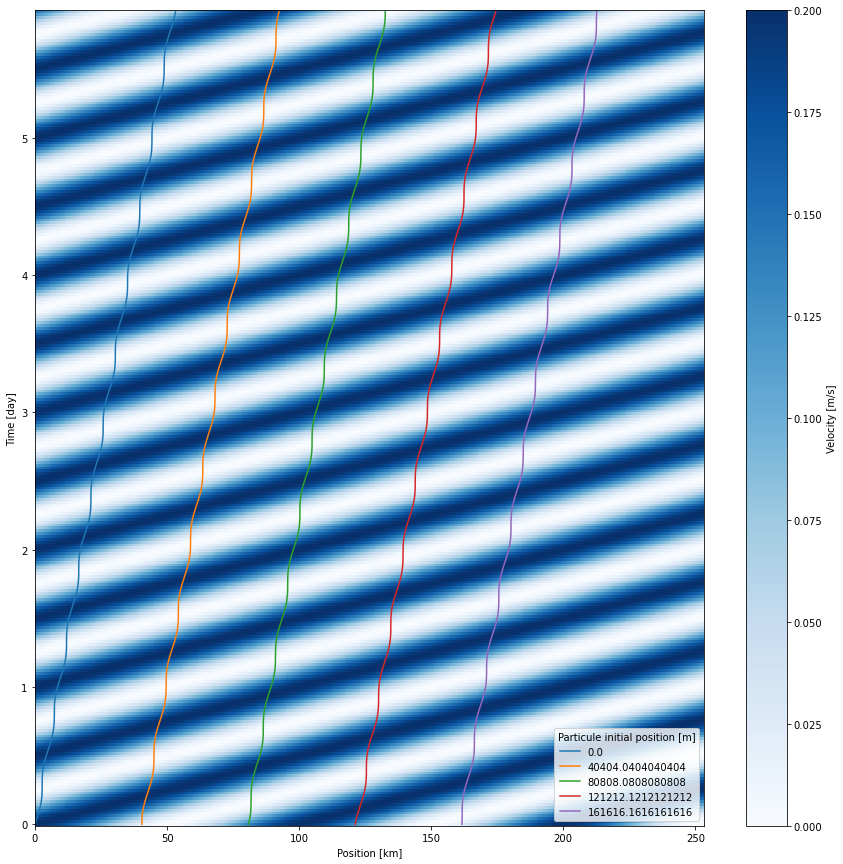

In [5]:
x.velocity_field().plot(y='t', figsize=(15,15), cmap='Blues')
x.out_ds.position_km.isel(a=slice(0,None,20)).plot(y='otime_day', hue='a')

#### Trajectories for different integration methods

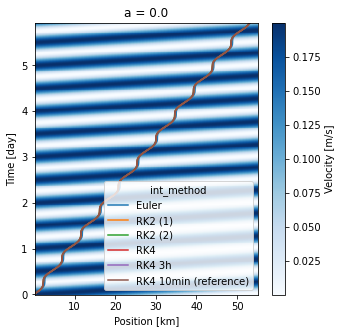

In [6]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=x.velocity_field()
vf=vf.where(vf.x.where(vf.x<55,  drop=True)>0, drop=True)
fg=vf.plot(y='t',figsize=(5,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


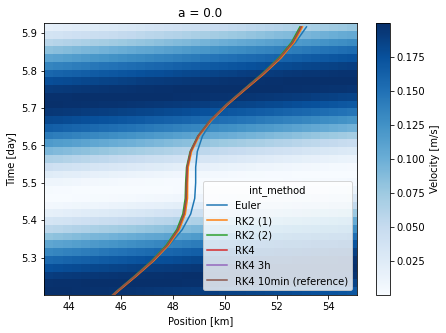

In [7]:
compx=sti.Temp_Int_Comp(x,advected=0)
vf=vf.where(vf.t>5.2, drop=True).where(vf.x.where(vf.x<55,  drop=True)>43, drop=True)
fg=vf.plot(y='t',figsize=(7,5), cmap='Blues')
compx.ds.position_km.isel(a=0).plot(y="otime_day",hue="int_method", ax=fg.axes)


# Unadvected Case
## Integration method dependency

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


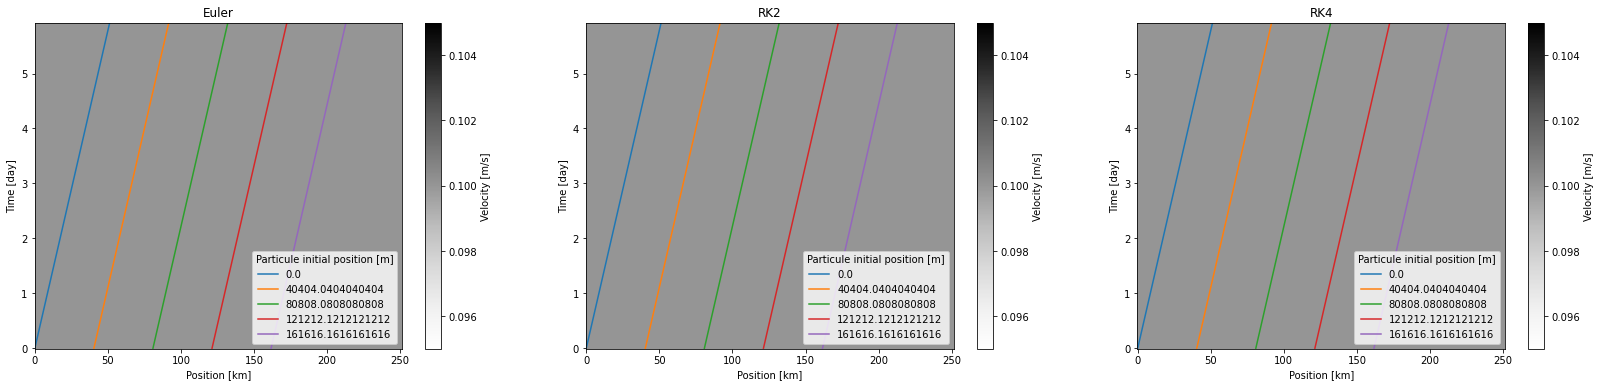

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(28,6))
y=sti.SetUp(advected=0,uw=0)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[0])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[0])
axes[0].title.set_text('Euler')

y.update_intmethod(sti.Runge_Kutta2)
y.velocity_field().plot(y='t',cmap='Greys', ax=axes[1])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[1])
axes[1].title.set_text('RK2')

y.update_intmethod(sti.Runge_Kutta4)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[2])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[2])
axes[2].title.set_text('RK4')

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


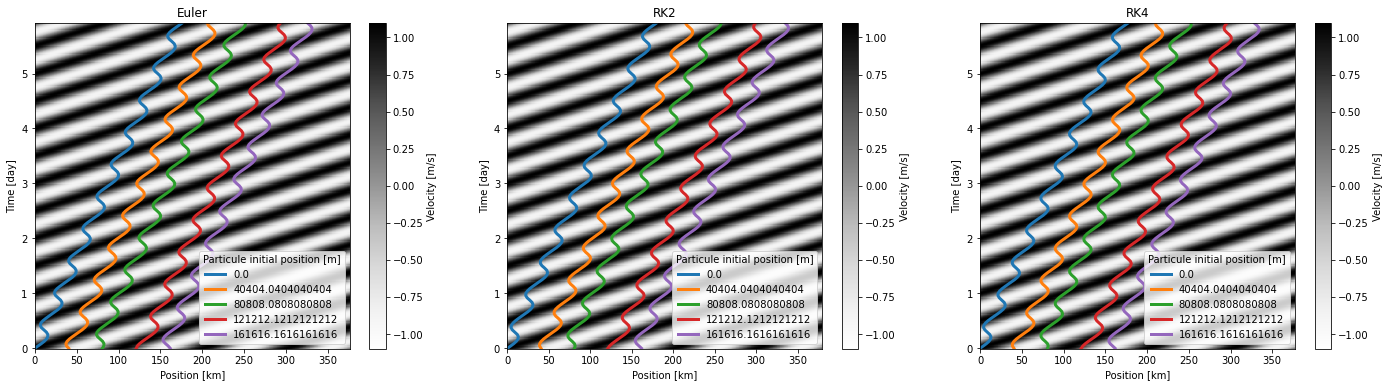

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(24,6))
y=sti.SetUp(advected=0, uw=1)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[0])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[0],lw=3)
axes[0].title.set_text('Euler')

y.update_intmethod(sti.Runge_Kutta2)
y.velocity_field().plot(y='t',cmap='Greys', ax=axes[1])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[1],lw=3)
axes[1].title.set_text('RK2')

y.update_intmethod(sti.Runge_Kutta4)
y.velocity_field().plot(y='t', cmap='Greys', ax=axes[2])
y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[2],lw=3)
axes[2].title.set_text('RK4')

## Dependency to parameters

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


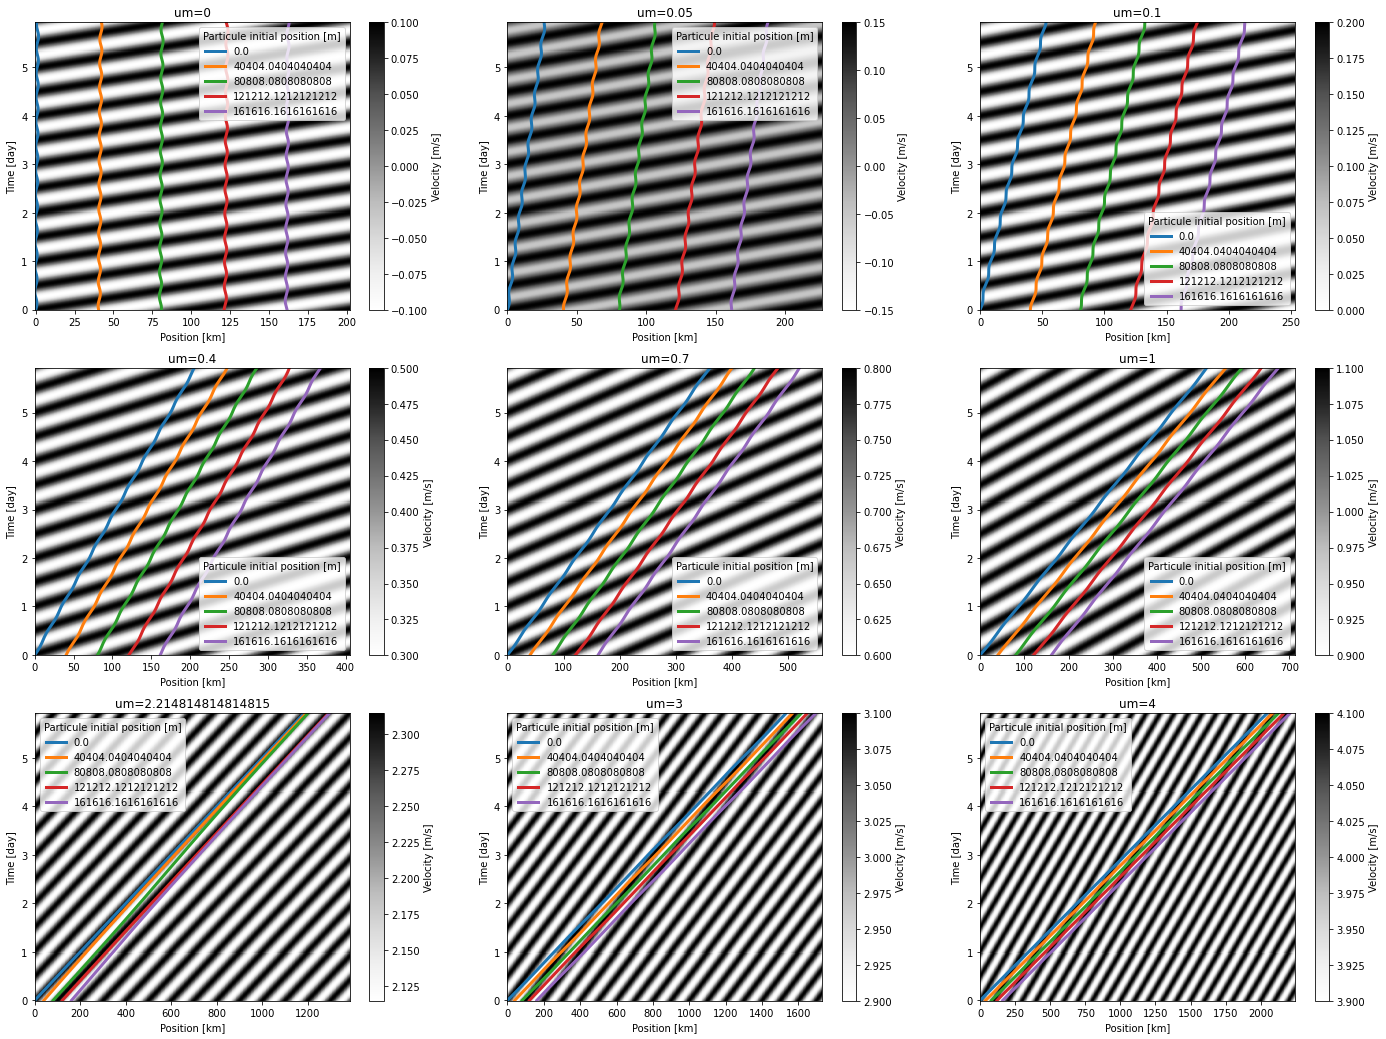

In [63]:
from math import *
Um=[0, 0.05,0.1,0.4,0.7,1, w2/k2-uw, 3, 4]
l=len(Um)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__um=Um[i])
    y.velocity_field().plot(y='t', cmap='Greys', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('um='+str(Um[i]))

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


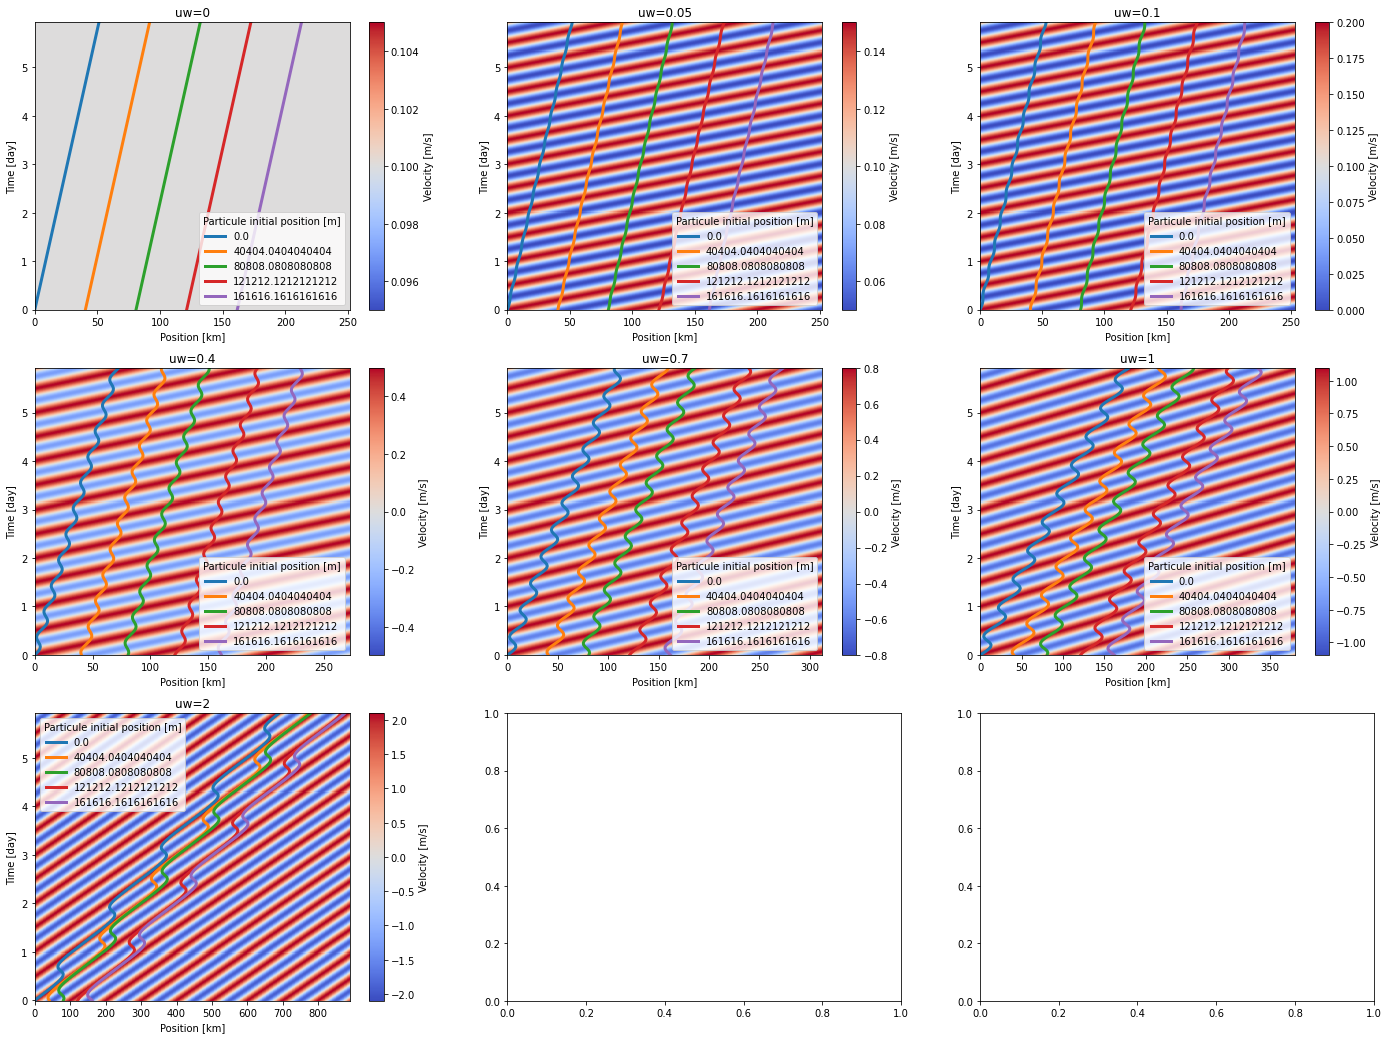

In [59]:
Uw=[0, 0.05,0.1,0.4,0.7,1,2]
l=len(Uw)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__uw=Uw[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('uw='+str(Uw[i]))

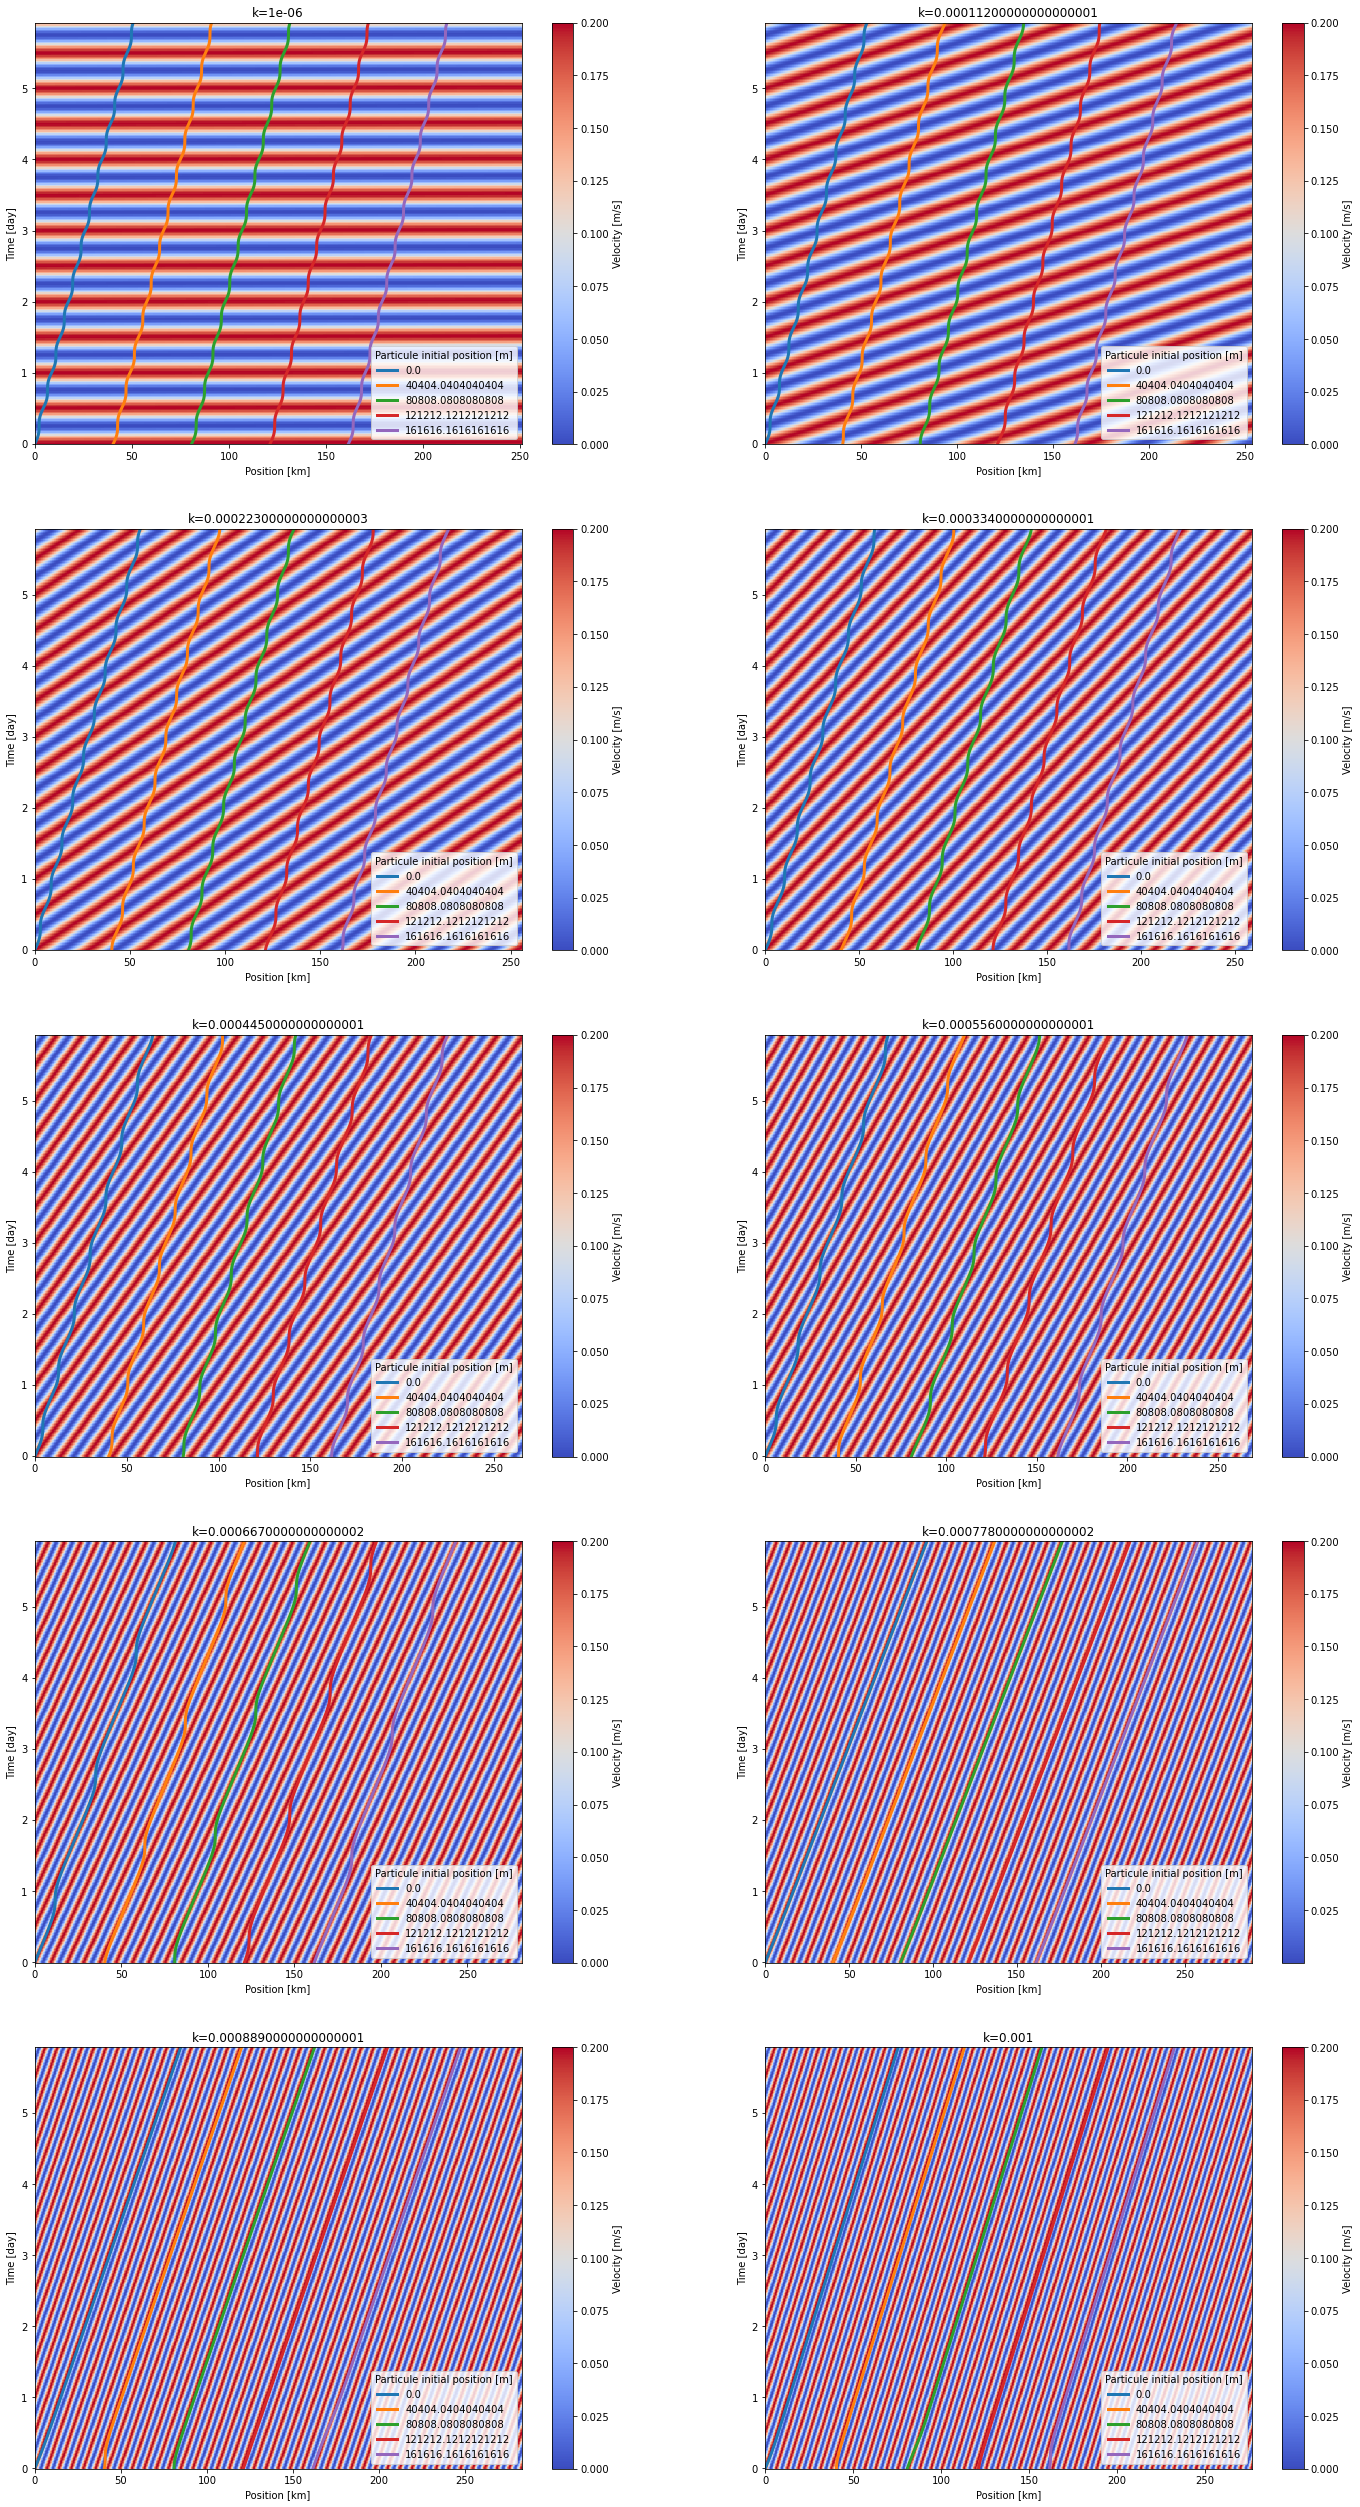

In [57]:

K=list(np.linspace(1e-6,1e-3,10))
l=len(K)
li=ceil(l/2.)

fig, axes = plt.subplots(nrows=li, ncols=2, figsize=(24,9*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__k=K[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('k='+str(K[i]))

/home/mdemol/.miniconda3/envs/stagem1/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


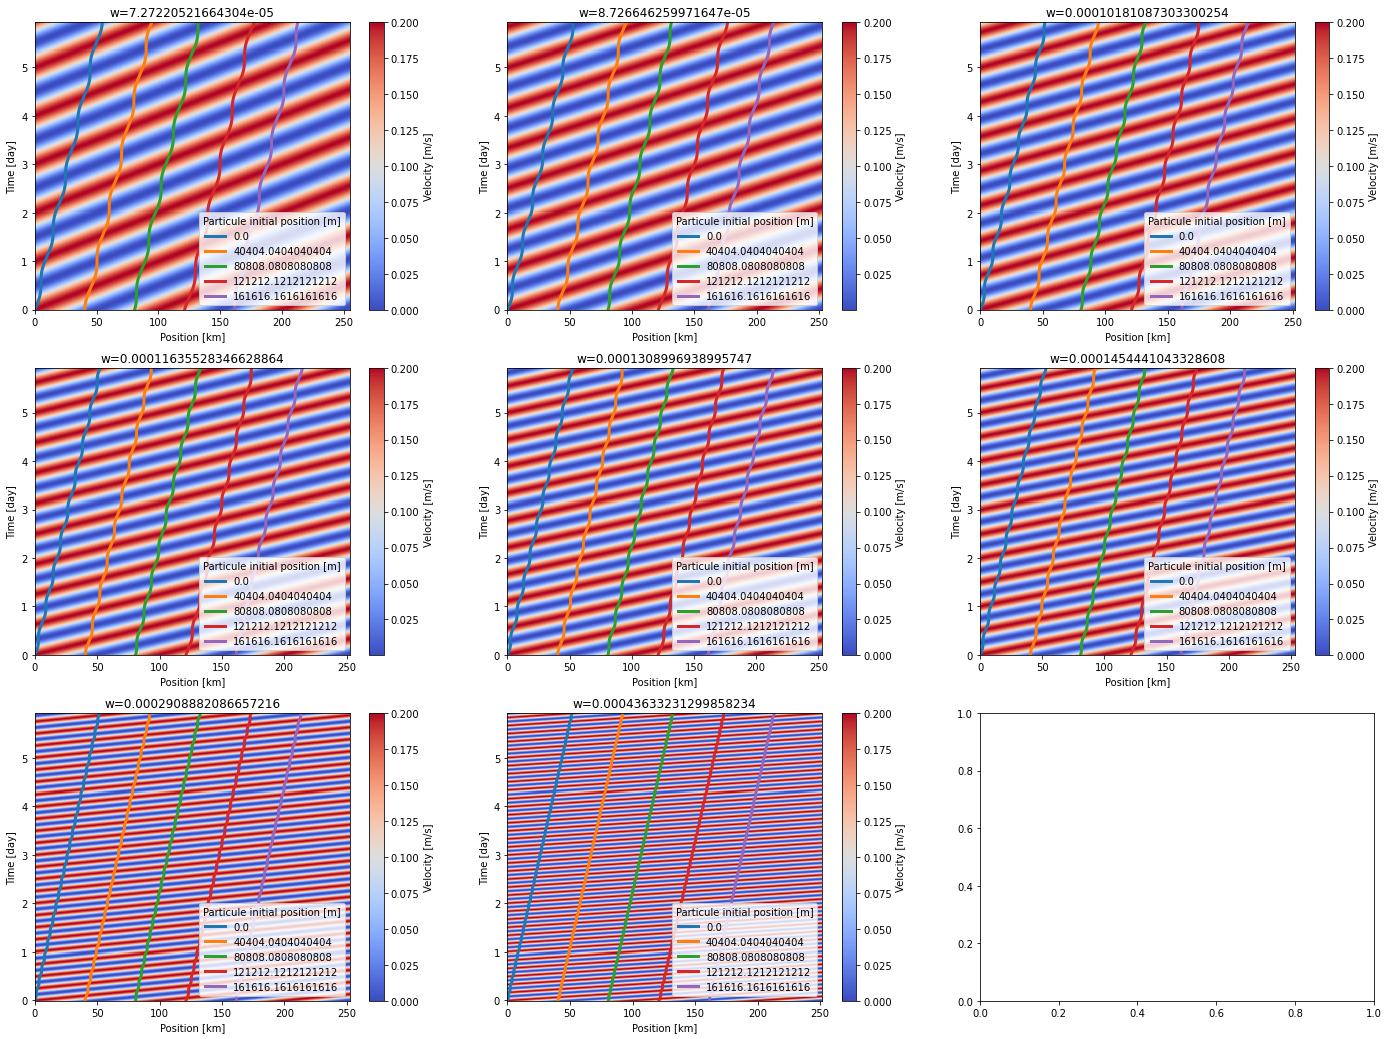

In [58]:
W=[1/2*sti.w2,6/10*sti.w2,7/10*sti.w2,8/10*sti.w2,9/10*sti.w2,1*sti.w2, 2*sti.w2, 3*sti.w2]
l=len(W)
li=ceil(l/3.)

fig, axes = plt.subplots(nrows=li, ncols=3, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__w=W[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('w='+str(W[i]))

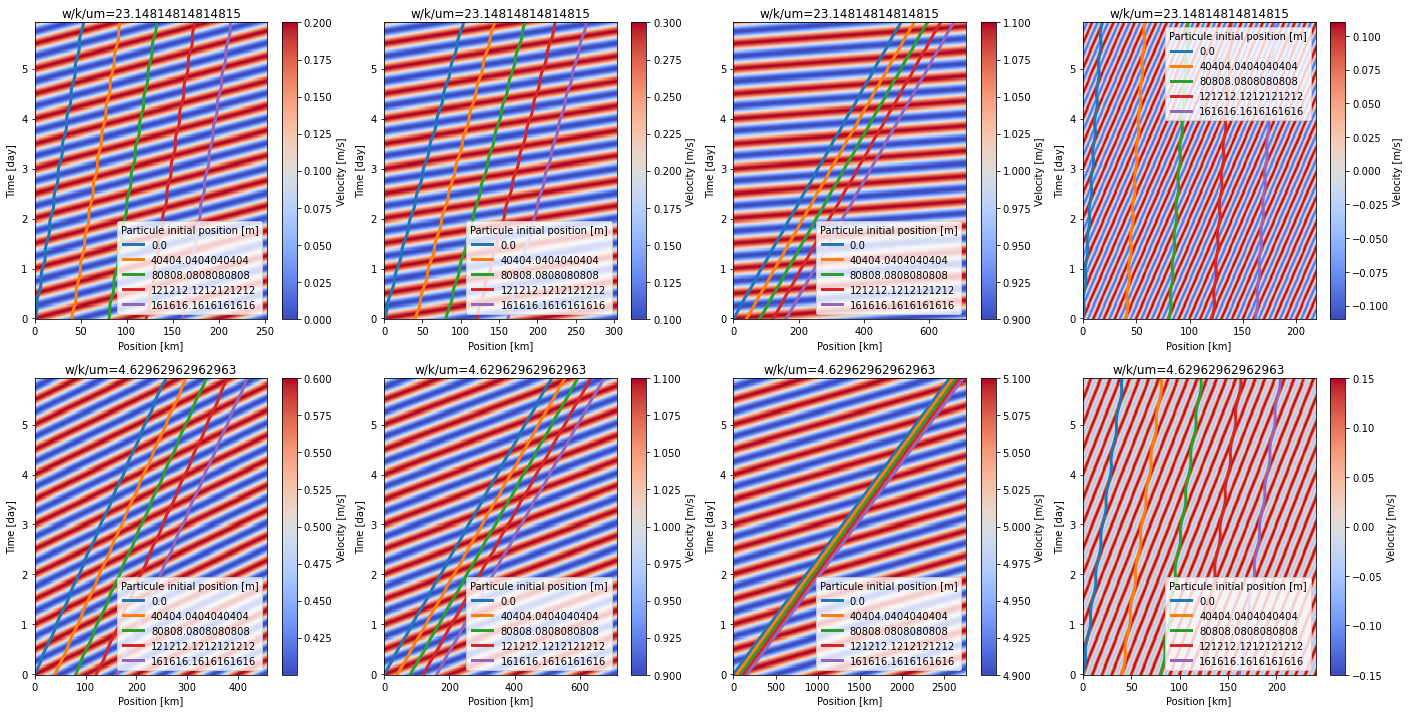

In [70]:
W=[sti.w2,sti.w2, 2*sti.w2, 2*sti.w2]
Uw=[uw,uw*2,uw*10, uw/10]
K=[sti.k2,sti.k2/2,sti.k2/10, sti.k2*10, sti.k2,sti.k2/2,sti.k2/10, sti.k2*10 ]
Um=[um,um*2,um*10, um/10,um*5,um*5*2,um*5*10, um*5/10]

l=len(Um)
li=ceil(l/4.)

fig, axes = plt.subplots(nrows=li, ncols=4, figsize=(24,6*li))
axes=axes.ravel()
y=sti.SetUp(advected=0)
y.update_intmethod(sti.Runge_Kutta2)
for i in range(l):
    y.update_parameters(velocity__k=K[i], velocity__um=Um[i])
    y.velocity_field().plot(y='t', cmap='coolwarm', ax=axes[i])
    y["p_km"].isel(a=slice(0,None,20)).plot(y='otime_day', hue='a',ax=axes[i],lw=3)
    axes[i].title.set_text('w/k/um='+str(sti.w2/K[i]/Um[i]))